<a href="https://colab.research.google.com/github/krishbhowmick/ML_AnalyticsVidhya/blob/main/ML12.1__Feature_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
bigmart = pd.read_csv('/content/drive/My Drive/ML_Code/12_Feature Engineering/4.  Feature Transformation/train_bm.csv')

In [ ]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Item Visibility Visualization

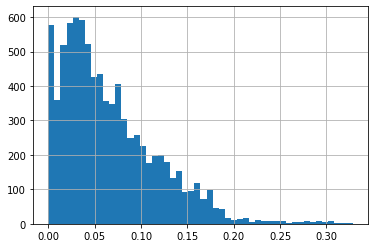

In [ ]:
bigmart['Item_Visibility'].hist(bins=50)

**We see that its a right skewed distribution. In this case we can take the root or apply log function. Lets try using a square root.**  

In [ ]:
item_visibility_squareroot = np.sqrt(bigmart['Item_Visibility']) # Square Root

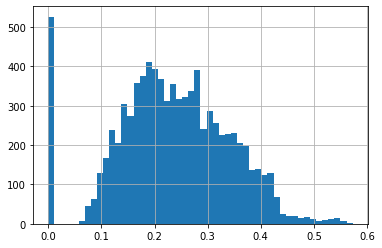

In [ ]:
item_visibility_squareroot.hist(bins=50)

**The resultant is a normal distribution. Now lets use the log function.**  

In [ ]:
item_visibility_log = np.log(bigmart['Item_Visibility'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


** This Shows a warning - 'divide by zero encountered in log'. Lets look at the range of the values in the visibility column**

In [ ]:
bigmart['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

**The minimun value we have is 0, and log(0) is not defined. Thus its showing us an error. So lets add 0.1 to each value and then take the log**

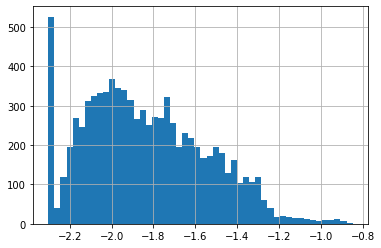

In [ ]:
item_visibility_log = np.log(bigmart['Item_Visibility']+0.1)
item_visibility_log.hist(bins=50)

**Here we get the visibility in negatives. This is because the values in the column are less than 1.**

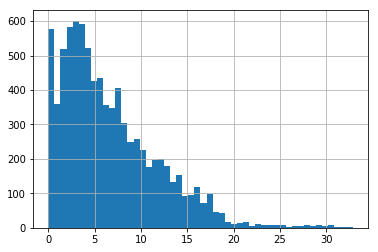

In [ ]:
visibility = bigmart['Item_Visibility']*100
visibility.hist(bins=50)

**Now taking the log**

In [ ]:
log_visibility = np.log(visibility+1)

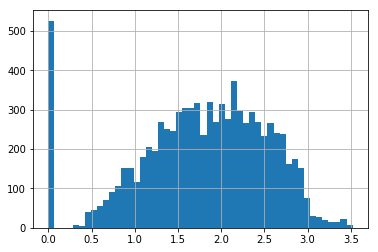

In [ ]:
log_visibility.hist(bins=50)

**Now we see that the distribution is symmetric and also the values are positive. **